# Visualization
import dataset from https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv", encoding = "latin1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


#### Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

In [10]:
country = df.groupby("Country").sum()
country = country.sort_values(by = "Quantity", ascending = False)[1:11]
country

,Quantity,UnitPrice,CustomerID
Country,,,
Netherlands,200128,6492.55,34190538.0
EIRE,142637,48447.19,110391745.0
Germany,117448,37666.00,120075093.0
France,110480,43031.99,107648864.0
Australia,83653,4054.75,15693002.0
Sweden,35637,1806.83,6790083.0
Switzerland,30325,6813.69,23775916.0
Spain,26824,12633.45,32689291.0
Japan,25218,814.86,4567292.0


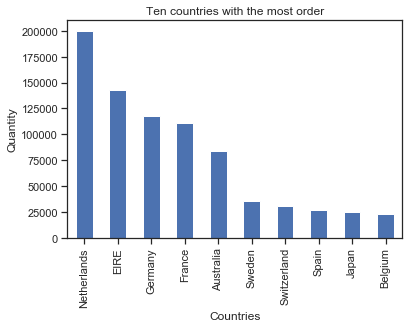

In [11]:
country["Quantity"].plot(kind = "bar")
plt.xlabel("Countries")
plt.ylabel("Quantity")
plt.title("Ten countries with the most order")
plt.show()

#### Exclude negative Quantity entries

In [12]:
df = df[df.Quantity > 0]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


#### Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries (except UK)

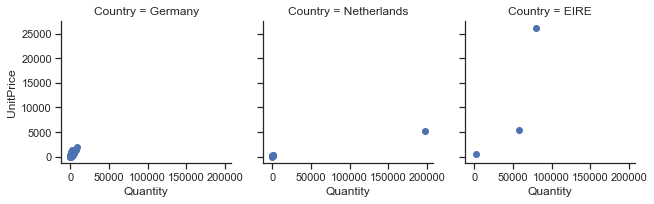

In [20]:
customer = df.groupby(["CustomerID", "Country"]).sum()
customer = customer[customer.UnitPrice > 0]
customer["Country"] = customer.index.get_level_values(1)
top_country = ["Netherlands", "EIRE", "Germany"]
customer = customer[customer["Country"].isin(top_country)]

# creates the FaceGrid
g = sns.FacetGrid(customer, col = "Country")
g.map(plt.scatter, "Quantity", "UnitPrice", alpha=1)
g.add_legend()

## Investigate why the previous results look so uninformative.

#### Display the first few rows of that DataFrame.

In [21]:
customer = df.groupby(["CustomerID", "Country"]).sum().head()
customer

,,Quantity,UnitPrice
CustomerID,Country,,
12346.0,United Kingdom,74215,1.04
12347.0,Iceland,2458,481.21
12348.0,Finland,2341,178.71
12349.0,Italy,631,605.10
12350.0,Norway,197,65.30


#### Think about what that piece of code does and display the dtype of UnitPrice

In [22]:
customer.UnitPrice.dtype

dtype('float64')

#### Pull data from df for CustomerIDs 12346.0 and 12347.0

In [23]:
display(df[df.CustomerID == 12346.0].sort_values(by = "UnitPrice", ascending = False).head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/11 10:01,1.04,12346.0,United Kingdom


In [24]:
display(df[df.CustomerID == 12347.0].sort_values(by = "UnitPrice", ascending = False).head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
428966,573511,22423,REGENCY CAKESTAND 3 TIER,6,10/31/11 12:25,12.75,12347.0,Iceland
286637,562032,22423,REGENCY CAKESTAND 3 TIER,3,8/2/11 8:48,12.75,12347.0,Iceland
72267,542237,22423,REGENCY CAKESTAND 3 TIER,3,1/26/11 14:30,12.75,12347.0,Iceland
148300,549222,22423,REGENCY CAKESTAND 3 TIER,3,4/7/11 10:43,12.75,12347.0,Iceland
428967,573511,23173,REGENCY TEAPOT ROSES,2,10/31/11 12:25,9.95,12347.0,Iceland


#### Find out the top 3 countries in terms of sales volume.

In [27]:
sale_volumn = df.groupby("Country").Quantity.sum().sort_values(ascending = False)
sale_top3 = sale_volumn[1:4]
sale_top3

Country
Netherlands    200937
EIRE           147447
Germany        119263
Name: Quantity, dtype: int64

#### Add a column to df called Revenue calculate the revenue (Quantity * UnitPrice) from each sale.

In [30]:
df["Revenue"] = df.Quantity * df.UnitPrice
df.head()

/Users/gympohnpimol/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


#### Group by CustomerID and Country and find out the average price (AvgPrice) each customer spends per unit.

In [35]:
gp = df[df.Country.isin(top_country)].groupby(["CustomerID", "Country"])
plott = gp["Quantity", "Revenue"].agg(sum)
plott["AvgPrice"] = plott.Revenue / plott.Quantity

plott["Country"] = plott.index.get_level_values(1)
plott.head()

,,Quantity,Revenue,AvgPrice,Country
CustomerID,Country,,,,
12426.0,Germany,258,582.73,2.258643,Germany
12427.0,Germany,533,825.80,1.549343,Germany
12468.0,Germany,366,729.54,1.993279,Germany
12471.0,Germany,8212,19824.05,2.414034,Germany
12472.0,Germany,4148,6572.11,1.584405,Germany


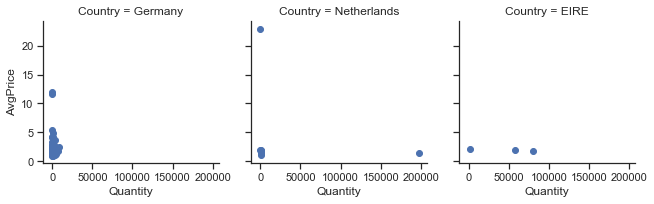

In [36]:
g = sns.FacetGrid(plott, col = "Country")
g.map(plt.scatter, "Quantity", "AvgPrice", alpha=1)
g.add_legend()

In [38]:
gp.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
385,536403,22867,HAND WARMER BIRD DESIGN,96,12/1/10 11:27,1.85,12791.0,Netherlands,177.6
386,536403,POST,POSTAGE,1,12/1/10 11:27,15.00,12791.0,Netherlands,15.0
1109,536527,22809,SET OF 6 T-LIGHTS SANTA,6,12/1/10 13:04,2.95,12662.0,Germany,17.7
1110,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,12/1/10 13:04,2.55,12662.0,Germany,15.3
1111,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,12/1/10 13:04,0.85,12662.0,Germany,10.2
...,...,...,...,...,...,...,...,...,...
541768,581578,POST,POSTAGE,3,12/9/11 12:16,18.00,12713.0,Germany,54.0
541769,581578,21124,SET/10 BLUE POLKADOT PARTY CANDLES,24,12/9/11 12:16,1.25,12713.0,Germany,30.0
541770,581578,21122,SET/10 PINK POLKADOT PARTY CANDLES,24,12/9/11 12:16,1.25,12713.0,Germany,30.0
541771,581578,21121,SET/10 RED POLKADOT PARTY CANDLES,24,12/9/11 12:16,1.25,12713.0,Germany,30.0


#### Plot the data for each CustomerID on a single graph

[]

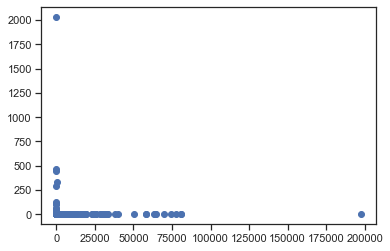

In [39]:
gp = df.groupby(["CustomerID"])
plott = gp["Revenue", "Quantity"].agg("sum")
plott["AvePrice"] = plott.Revenue / plott.Quantity
plt.scatter(plott.Quantity, plott.AvePrice)
plt.plot()

#### Zoom in so we can see that curve more clearly

[]

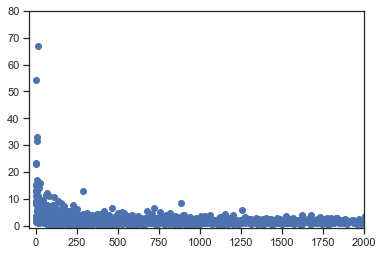

In [41]:
gp = df.groupby(["CustomerID", "Country"])
plott = gp.agg({"Revenue": "sum",
                "Quantity": "sum"})
plott["AvgPrice"] = plott.Revenue / plott.Quantity
plt.scatter(plott.Quantity, plott.AvgPrice)
plt.xlim(-40, 2000)
plt.ylim(-1, 80)
plt.plot()

## Plot a line chart showing revenue (y) per UnitPrice (x)

#### Group UnitPrice by intervals of 1 for prices [0,50), and sum Quantity and Revenue

In [42]:
price_start = 0
price_end = 50
price_interval = 1
buckets = np.arange(price_start, price_end, price_interval)
revenue = df.groupby(pd.cut(df.UnitPrice, buckets)).Revenue.sum()
revenue.head()

UnitPrice
(0, 1]    1.107775e+06
(1, 2]    2.691765e+06
(2, 3]    2.024143e+06
(3, 4]    8.651018e+05
(4, 5]    1.219377e+06
Name: Revenue, dtype: float64

#### Plot

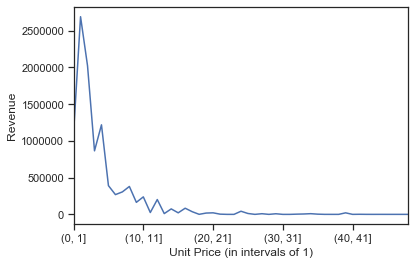

In [43]:
revenue.plot()
plt.xlabel('Unit Price (in intervals of '+str(price_interval)+')')
plt.ylabel('Revenue')
plt.show()

#### Make it look nicer

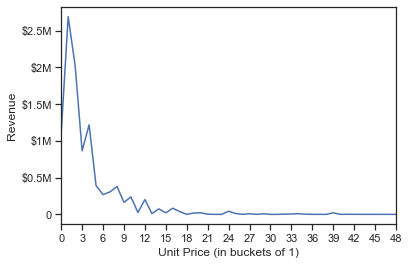

In [45]:
revenue.plot()
plt.xlabel('Unit Price (in buckets of '+str(price_interval)+')') 
plt.ylabel('Revenue')
plt.xticks(np.arange(price_start, price_end,3),
           np.arange(price_start, price_end,3))
plt.yticks([0, 500000, 1000000, 1500000, 2000000, 2500000],
           ['0', '$0.5M', '$1M', '$1.5M', '$2M', '$2.5M'])
plt.show()